# PROYECTO CIFAR-10

## CARLOS CABAÑÓ

## 1. Librerias

Descargamos la librería para los arrays en preprocesamiento de Keras


In [1]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime
import random

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2. Arquitectura de red del modelo


Adoptamos la arquitectura del modelo 11 con los ajustes en Batch Normalization, Kernel Regularizer y Kernel Initializer. Añadimos Batch normalization a las capas de convolución.

In [2]:
model = ks.Sequential()

model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same', input_shape=(32,32,3)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(256, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(256, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(256, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(512, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(512, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(512, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(512, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Conv2D(512, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(512, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.0005), kernel_initializer="he_uniform", padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer="he_uniform"))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.4))
model.add(ks.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer="he_uniform"))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

## 3. Optimizador, función error


Añadimos el learning rate al optimizador

In [3]:
from keras.optimizers import SGD

model.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. Preparamos los datos

In [4]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Pintemos una muestra de las imagenes del dataset CIFAR10:

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


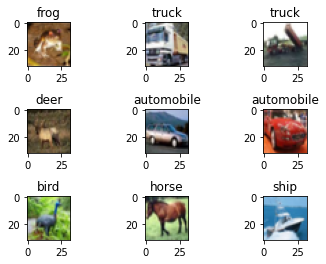

In [6]:
# Pintemos una muestra de las las imagenes del dataset MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Hacemos la validación al mismo tiempo que el entrenamiento:

In [7]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


Hacemos el OHE para la clasificación

In [8]:
le = LabelEncoder()
le.fit(y_train.ravel())
y_train_encoded = le.transform(y_train.ravel())
y_val_encoded = le.transform(y_val.ravel())
y_test_encoded = le.transform(y_test.ravel())

## 5. Ajustes: Early Stopping 

Definimos un early stopping con base en el loss de validación y con el parámetro de "patience" a 10, para tener algo de margen. Con el Early Stopping lograremos parar el entrenamiento en el momento óptimo para evitar que siga entrenando a partir del overfitting.

In [9]:
callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

## 6. Transformador de imágenes

### 6.1 Imágenes de entrenamiento

In [10]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    )

train_generator = train_datagen.flow(
    x_train, 
    y_train_encoded, 
    batch_size=64
)

### 6.2 Imágenes de validación y testeo

In [11]:
validation_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    )

validation_generator = validation_datagen.flow(
    x_val, 
    y_val_encoded, 
    batch_size=64
)

test_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    )

test_generator = test_datagen.flow(
    x_test, 
    y_test_encoded,
    batch_size=64
)

### 6.3 Generador de datos

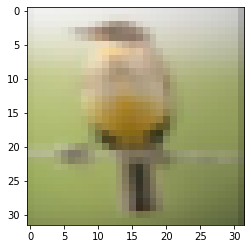

In [12]:
sample = random.choice(range(0,1457))
image = x_train[sample]
plt.imshow(image, cmap=plt.cm.binary)

In [13]:
sample = random.choice(range(0,1457))

example_generator = train_datagen.flow(
    x_train[sample:sample+1],
    y_train_encoded[sample:sample+1],
    batch_size=64
    )

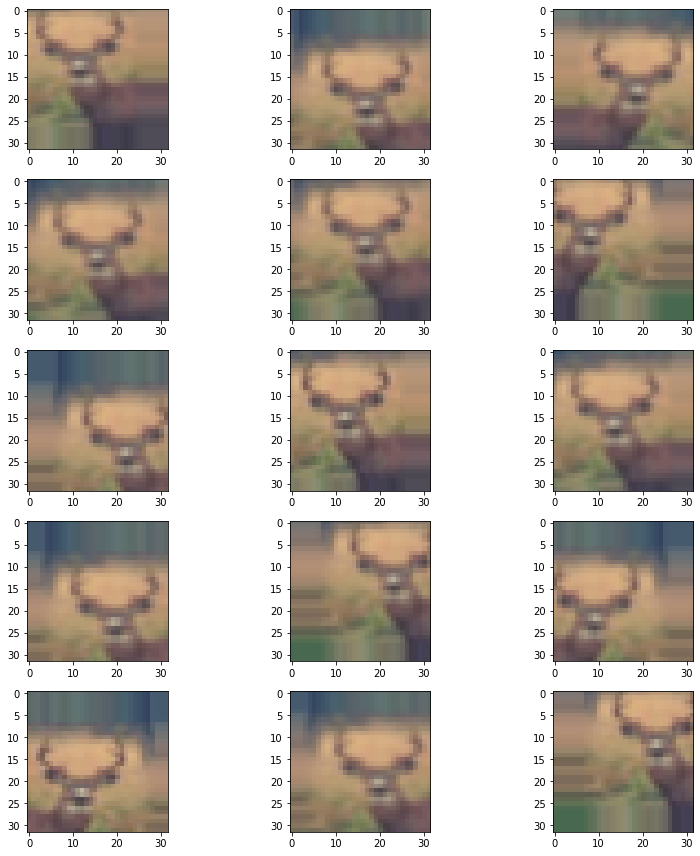

In [14]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X, Y in example_generator:
        image = X[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## 7. Entrenamiento 

In [15]:
t = time.perf_counter()

In [16]:
steps=int(x_train.shape[0]/64)
history = model.fit(train_generator, epochs=100, use_multiprocessing=False, batch_size= 64, validation_data=validation_generator, steps_per_epoch=steps, callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/100
625/625 [==============================] - 41s 50ms/step - loss: 9.1824 - accuracy: 0.1818 - val_loss: 8.0948 - val_accuracy: 0.2919
Epoch 2/100
625/625 [==============================] - 31s 50ms/step - loss: 8.1597 - accuracy: 0.2860 - val_loss: 7.7903 - val_accuracy: 0.3788
Epoch 3/100
625/625 [==============================] - 31s 50ms/step - loss: 7.8230 - accuracy: 0.3567 - val_loss: 7.5712 - val_accuracy: 0.4234
Epoch 4/100
625/625 [==============================] - 31s 50ms/step - loss: 7.5809 - accuracy: 0.4103 - val_loss: 7.4885 - val_accuracy: 0.4396
Epoch 5/100
625/625 [==============================] - 31s 50ms/step - loss: 7.3967 - accuracy: 0.4581 - val_loss: 7.2569 - val_accuracy: 0.4816
Epoch 6/100
625/625 [==============================] - 31s 50ms/step - loss: 7.2303 - accuracy: 0.4798 - val_loss: 7.0436 - val_accuracy: 0.5258
Epoch 7/100
625/625 [==============================] - 31s 50ms/step - loss: 7.0667 - accuracy: 0.5102 - val_loss: 7.0003 - val_ac

In [17]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:52:12.653343


## 8. Evaluamos los resultados


In [18]:
_, acc = model.evaluate(x_test, y_test_encoded, verbose=0)
print('> %.3f' % (acc * 100.0))

> 87.290


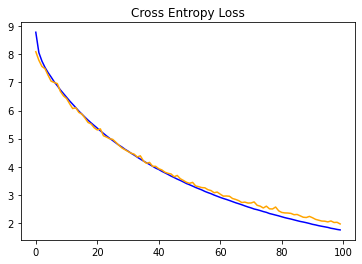

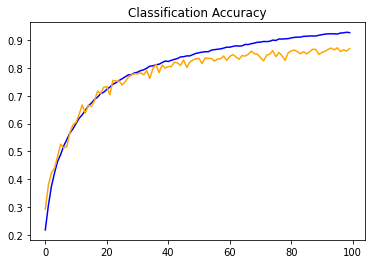

In [19]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

In [20]:
predictions = model.predict(x_test)

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

Dibujamos las primeras imágenes:

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


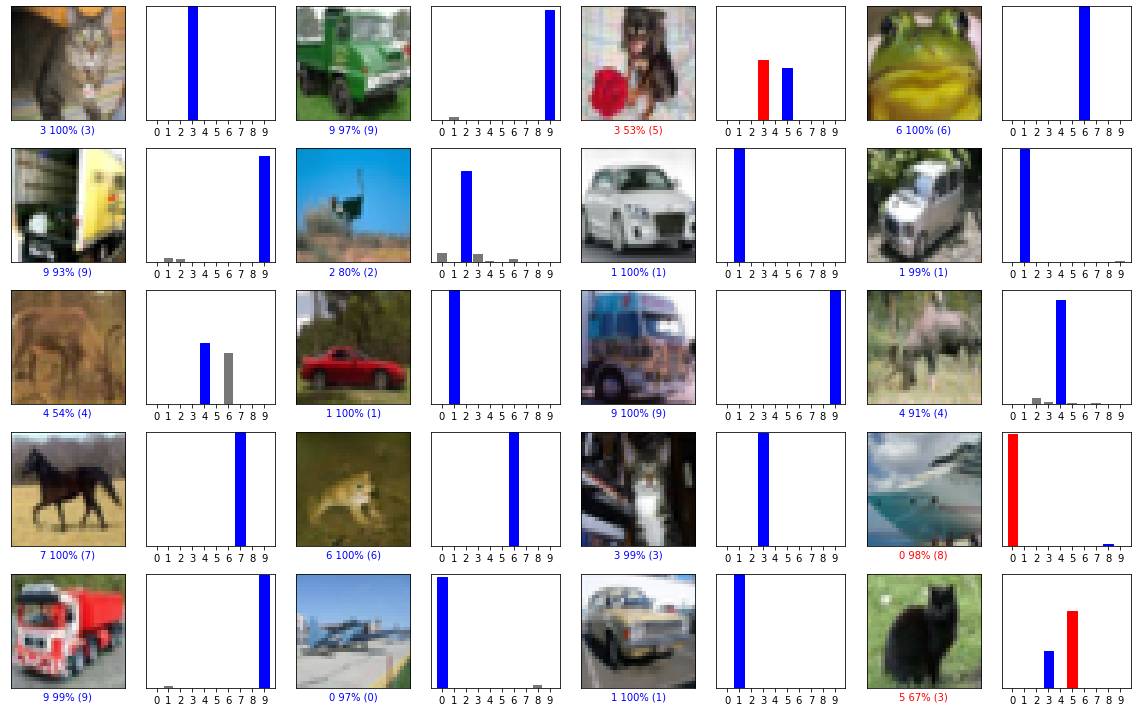

In [22]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+start, predictions[i+start], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()